In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="Enter API KEY HERE")
project = rf.workspace("universitas-diponegoro-mb10s").project("car-detection-nxsxm")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.45, to fix: `pip install ultralytics==8.0.196`


In [2]:
!git clone https://github.com/ultralytics/ultralytics

fatal: destination path 'ultralytics' already exists and is not an empty directory.


In [3]:
import os

dataset_path = 'Car-detection-1'  # Adjust this to the path of your dataset

# List the directories within the dataset
for dirpath, dirnames, filenames in os.walk(dataset_path):
    print(f"Found directory: {dirpath}")
    for filename in filenames[:5]:  # Just print the first 5 files for brevity
        print(f"  {filename}")

Found directory: Car-detection-1
  data.yaml
  README.dataset.txt
  README.roboflow.txt
Found directory: Car-detection-1\test
Found directory: Car-detection-1\test\images
  youtube-44_jpg.rf.4a9b4bd6780237f50038cf6d47e121ba.jpg
  youtube-59_jpg.rf.d5d4cce3b92916006b85a365ef419c13.jpg
  youtube-62_jpg.rf.eeb271a7bb61e742698397b1b5cf7deb.jpg
Found directory: Car-detection-1\test\labels
  youtube-44_jpg.rf.4a9b4bd6780237f50038cf6d47e121ba.txt
  youtube-59_jpg.rf.d5d4cce3b92916006b85a365ef419c13.txt
  youtube-62_jpg.rf.eeb271a7bb61e742698397b1b5cf7deb.txt
Found directory: Car-detection-1\train
Found directory: Car-detection-1\train\images
  -0378D390-5AE2-4D09-84BB-387E850F5E5A-png_jpg.rf.513cdbac98dc8698c9fea99e25866f7c.jpg
  -0378D390-5AE2-4D09-84BB-387E850F5E5A-png_jpg.rf.51fe3b159fe8fd5caeba316c3fde341d.jpg
  -0378D390-5AE2-4D09-84BB-387E850F5E5A-png_jpg.rf.6f47f4ab2d0759d687130cb755269dfe.jpg
  -0378D390-5AE2-4D09-84BB-387E850F5E5A-png_jpg.rf.7d98bdf3d0a3391cc3160baf7bc13a9b.jpg
  -03

In [17]:
with open(os.path.join(dataset_path, 'data.yaml'), 'r') as file:
    print(file.read())

names:
- car
nc: 1
roboflow:
  license: CC BY 4.0
  project: car-detection-nxsxm
  url: https://universe.roboflow.com/universitas-diponegoro-mb10s/car-detection-nxsxm/dataset/1
  version: 1
  workspace: universitas-diponegoro-mb10s
test: C:/Users/shane/Car_Detection/Car-detection-1/test/images
train: C:/Users/shane/Car_Detection/Car-detection-1/train/images
val: C:/Users/shane/Car_Detection/Car-detection-1/val/images



In [18]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Set or correct the dataset_path variable
dataset_path = 'Car-detection-1'  # Adjust based on your setup
print("Dataset Path:", dataset_path)

Current Working Directory: C:\Users\shane\Car_Detection
Dataset Path: Car-detection-1


In [19]:
# List files in the specified directory to verify the image file's presence
image_directory = os.path.join(dataset_path, 'train/images')
print(f"Listing files in {image_directory}:\n")
!dir "{image_directory}"  # For Windows

Listing files in Car-detection-1\train/images:

 Volume in drive C has no label.
 Volume Serial Number is DEB0-8041

 Directory of C:\Users\shane\Car_Detection\Car-detection-1\train\images

2024-04-08  12:30 AM    <DIR>          .
2024-04-08  12:30 AM    <DIR>          ..
2024-04-08  12:30 AM            46,545 -0378D390-5AE2-4D09-84BB-387E850F5E5A-png_jpg.rf.513cdbac98dc8698c9fea99e25866f7c.jpg
2024-04-08  12:30 AM            46,545 -0378D390-5AE2-4D09-84BB-387E850F5E5A-png_jpg.rf.51fe3b159fe8fd5caeba316c3fde341d.jpg
2024-04-08  12:30 AM            19,551 -0378D390-5AE2-4D09-84BB-387E850F5E5A-png_jpg.rf.6f47f4ab2d0759d687130cb755269dfe.jpg
2024-04-08  12:30 AM            41,734 -0378D390-5AE2-4D09-84BB-387E850F5E5A-png_jpg.rf.7d98bdf3d0a3391cc3160baf7bc13a9b.jpg
2024-04-08  12:30 AM            39,152 -0378D390-5AE2-4D09-84BB-387E850F5E5A-png_jpg.rf.831af8a40cbadcf3ec0f40086911bceb.jpg
2024-04-08  12:30 AM            22,591 -0378D390-5AE2-4D09-84BB-387E850F5E5A-png_jpg.rf.d0b302f906b235

File Not Found


In [20]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def display_image_with_boxes(image_path, label_path):
    # Load the image
    img = Image.open(image_path)
    fig, ax = plt.subplots()
    ax.imshow(img)
    
    # Open the label file and draw boxes
    with open(label_path, 'r') as f:
        for line in f.readlines():
            # Assuming the format: class x_center y_center width height
            _, x_center, y_center, width, height = map(float, line.split())
            
            # Convert to pixel coordinates
            img_width, img_height = img.size
            x_center, y_center, width, height = x_center * img_width, y_center * img_height, width * img_width, height * img_height
            left, top = x_center - width / 2, y_center - height / 2
            
            # Create a Rectangle patch
            rect = Rectangle((left, top), width, height, linewidth=2, edgecolor='r', facecolor='none')
            
            # Add the patch to the Axes
            ax.add_patch(rect)
    
    plt.axis('off')  # Turn off axis
    plt.show()

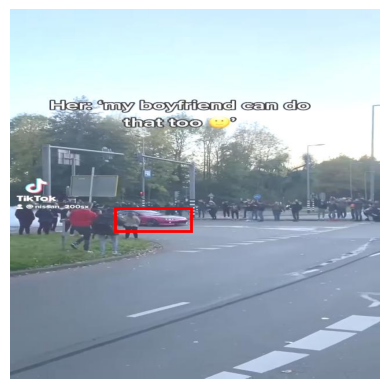

In [21]:
image_filename = 'youtube-21_jpg.rf.723924ba40644beb42eb488edaec1c69.jpg'  # Corrected file name
image_path = os.path.join('Car-detection-1', 'train/images', image_filename)
label_path = os.path.join('Car-detection-1', 'train/labels', image_filename.replace('.jpg', '.txt'))

display_image_with_boxes(image_path, label_path)

In [22]:
from ultralytics import YOLO

In [36]:
model = YOLO("yolov8s.yaml")

In [37]:
model.train(data="C:/Users/shane/Car_Detection/Car-detection-1/data.yaml", epochs=3)
metrics = model.val()  # Evaluate model performance on the validation set
results = model.predict("C:/Users/shane/Car_Detection/Car-detection-1/test/images")
path = model.export(format="onnx")  # Export the model to ONNX format

print("Training complete.")
print("Validation metrics:", metrics)
print("Prediction results:", results)
print("Model exported to:", path)

Ultralytics YOLOv8.1.45  Python-3.10.13 torch-2.2.1+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.yaml, data=C:/Users/shane/Car_Detection/Car-detection-1/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

train: Scanning C:\Users\shane\Car_Detection\Car-detection-1\train\labels.cache... 474 images, 0 backgrounds, 0 corrupt: 100%|██████████| 474/474 [00:00<?, ?it/s]
val: Scanning C:\Users\shane\Car_Detection\Car-detection-1\valid\labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]


Plotting labels to runs\detect\train7\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train7
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      3.148       3.67      4.194         28        640: 100%|██████████| 30/30 [09:41<00:00, 19.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.37s/it]

                   all         38         41    0.00272      0.756      0.505      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      3.079      3.424      3.955         37        640: 100%|██████████| 30/30 [10:38<00:00, 21.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.29s/it]

                   all         38         41      0.008       0.61     0.0761     0.0232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      2.954      3.353      3.771         25        640: 100%|██████████| 30/30 [09:10<00:00, 18.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.46s/it]

                   all         38         41    0.00219       0.61     0.0261    0.00728



3 epochs completed in 0.509 hours.
Optimizer stripped from runs\detect\train7\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train7\weights\best.pt, 22.5MB

Validating runs\detect\train7\weights\best.pt...
Ultralytics YOLOv8.1.45  Python-3.10.13 torch-2.2.1+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
YOLOv8s summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.09s/it]


                   all         38         41    0.00272      0.756      0.474      0.144
Speed: 3.1ms preprocess, 404.3ms inference, 0.0ms loss, 7.5ms postprocess per image
Results saved to runs\detect\train7
Ultralytics YOLOv8.1.45  Python-3.10.13 torch-2.2.1+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
YOLOv8s summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning C:\Users\shane\Car_Detection\Car-detection-1\valid\labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.01s/it]


                   all         38         41    0.00272      0.756      0.474      0.144
Speed: 3.9ms preprocess, 370.7ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to runs\detect\train72

image 1/3 C:\Users\shane\Car_Detection\Car-detection-1\test\images\youtube-44_jpg.rf.4a9b4bd6780237f50038cf6d47e121ba.jpg: 640x640 (no detections), 380.7ms
image 2/3 C:\Users\shane\Car_Detection\Car-detection-1\test\images\youtube-59_jpg.rf.d5d4cce3b92916006b85a365ef419c13.jpg: 640x640 (no detections), 316.3ms
image 3/3 C:\Users\shane\Car_Detection\Car-detection-1\test\images\youtube-62_jpg.rf.eeb271a7bb61e742698397b1b5cf7deb.jpg: 640x640 (no detections), 303.4ms
Speed: 3.5ms preprocess, 333.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.1.45  Python-3.10.13 torch-2.2.1+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)

PyTorch: starting from 'runs\detect\train7\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 84

In [40]:
model_yolov8s = YOLO("yolov8s.pt")

In [27]:
# model.train(data="C:/Users/shane/Car_Detection/Car-detection-1/data.yaml", epochs=3)
# metrics = model.val()  # Evaluate model performance on the validation set
# results = model("C:/Users/shane/Car_Detection/Car-detection-1/test/images")
# path = model.export(format="onnx")  # Export the model to ONNX format

# print("Training complete.")
# print("Validation metrics:", metrics)
# print("Prediction results:", results)
# print("Model exported to:", path)

Ultralytics YOLOv8.1.45  Python-3.10.13 torch-2.2.1+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/shane/Car_Detection/Car-detection-1/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

train: Scanning C:\Users\shane\Car_Detection\Car-detection-1\train\labels.cache... 474 images, 0 backgrounds, 0 corrupt: 100%|██████████| 474/474 [00:00<?, ?it/s]
val: Scanning C:\Users\shane\Car_Detection\Car-detection-1\valid\labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]

Plotting labels to runs\detect\train6\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train6
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.008      1.651      1.335         28        640: 100%|██████████| 30/30 [09:08<00:00, 18.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.10s/it]

                   all         38         41      0.724      0.902      0.895       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      1.083      1.149      1.406         37        640: 100%|██████████| 30/30 [08:35<00:00, 17.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.44s/it]

                   all         38         41      0.792      0.837      0.892      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      1.043     0.9458      1.342         25        640: 100%|██████████| 30/30 [08:34<00:00, 17.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.89s/it]

                   all         38         41       0.92      0.927      0.942      0.644



3 epochs completed in 0.455 hours.
Optimizer stripped from runs\detect\train6\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train6\weights\best.pt, 22.5MB

Validating runs\detect\train6\weights\best.pt...
Ultralytics YOLOv8.1.45  Python-3.10.13 torch-2.2.1+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.02s/it]


                   all         38         41       0.92      0.927      0.942      0.643
Speed: 4.6ms preprocess, 353.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\train6
Ultralytics YOLOv8.1.45  Python-3.10.13 torch-2.2.1+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning C:\Users\shane\Car_Detection\Car-detection-1\valid\labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.88s/it]


                   all         38         41       0.92      0.927      0.942      0.643
Speed: 3.6ms preprocess, 367.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\train62

image 1/3 C:\Users\shane\Car_Detection\Car-detection-1\test\images\youtube-44_jpg.rf.4a9b4bd6780237f50038cf6d47e121ba.jpg: 640x640 1 car, 329.8ms
image 2/3 C:\Users\shane\Car_Detection\Car-detection-1\test\images\youtube-59_jpg.rf.d5d4cce3b92916006b85a365ef419c13.jpg: 640x640 (no detections), 323.1ms
image 3/3 C:\Users\shane\Car_Detection\Car-detection-1\test\images\youtube-62_jpg.rf.eeb271a7bb61e742698397b1b5cf7deb.jpg: 640x640 (no detections), 366.3ms
Speed: 23.7ms preprocess, 339.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.1.45  Python-3.10.13 torch-2.2.1+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)

PyTorch: starting from 'runs\detect\train6\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (21.5

In [42]:
model_yolov8s.train(data="C:/Users/shane/Car_Detection/Car-detection-1/data.yaml", epochs=3, project='CarDetectionProject', name='YOLOv8s_Training')

metrics = model_yolov8s.val()  # Evaluate model performance on the validation set
results = model_yolov8s.predict("C:/Users/shane/Car_Detection/Car-detection-1/test/images")
path = model_yolov8s(format="onnx")  # Export the model to ONNX format

print("Training complete.")
print("Validation metrics:", metrics)
print("Prediction results:", results)
print("Model exported to:", path)

Ultralytics YOLOv8.1.45  Python-3.10.13 torch-2.2.1+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/shane/Car_Detection/Car-detection-1/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=CarDetectionProject, name=YOLOv8s_Training2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fa

train: Scanning C:\Users\shane\Car_Detection\Car-detection-1\train\labels.cache... 474 images, 0 backgrounds, 0 corrupt: 100%|██████████| 474/474 [00:00<?, ?it/s]
val: Scanning C:\Users\shane\Car_Detection\Car-detection-1\valid\labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]

Plotting labels to CarDetectionProject\YOLOv8s_Training2\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to CarDetectionProject\YOLOv8s_Training2
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G     0.9279     0.8079      1.265         28        640: 100%|██████████| 30/30 [08:45<00:00, 17.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.98s/it]

                   all         38         41      0.985       0.78      0.938      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      0.933     0.8081      1.285         37        640: 100%|██████████| 30/30 [08:38<00:00, 17.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.68s/it]

                   all         38         41      0.933      0.927       0.97      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G     0.9328     0.7435      1.281         25        640: 100%|██████████| 30/30 [08:34<00:00, 17.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.76s/it]

                   all         38         41      0.904      0.921      0.953      0.609



3 epochs completed in 0.450 hours.
Optimizer stripped from CarDetectionProject\YOLOv8s_Training2\weights\last.pt, 22.5MB
Optimizer stripped from CarDetectionProject\YOLOv8s_Training2\weights\best.pt, 22.5MB

Validating CarDetectionProject\YOLOv8s_Training2\weights\best.pt...
Ultralytics YOLOv8.1.45  Python-3.10.13 torch-2.2.1+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.98s/it]


                   all         38         41      0.904      0.921      0.953      0.609
Speed: 3.7ms preprocess, 353.2ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to CarDetectionProject\YOLOv8s_Training2
Ultralytics YOLOv8.1.45  Python-3.10.13 torch-2.2.1+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning C:\Users\shane\Car_Detection\Car-detection-1\valid\labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.70s/it]


                   all         38         41      0.904      0.921      0.953      0.609
Speed: 3.1ms preprocess, 353.0ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to CarDetectionProject\YOLOv8s_Training22

image 1/3 C:\Users\shane\Car_Detection\Car-detection-1\test\images\youtube-44_jpg.rf.4a9b4bd6780237f50038cf6d47e121ba.jpg: 640x640 1 car, 352.3ms
image 2/3 C:\Users\shane\Car_Detection\Car-detection-1\test\images\youtube-59_jpg.rf.d5d4cce3b92916006b85a365ef419c13.jpg: 640x640 1 car, 353.3ms
image 3/3 C:\Users\shane\Car_Detection\Car-detection-1\test\images\youtube-62_jpg.rf.eeb271a7bb61e742698397b1b5cf7deb.jpg: 640x640 1 car, 349.4ms
Speed: 4.5ms preprocess, 351.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
WARNING  'source' is missing. Using 'source=C:\Users\shane\anaconda3\envs\Python3-10-Build\Lib\site-packages\ultralytics\assets'.

image 1/2 C:\Users\shane\anaconda3\envs\Python3-10-Build\Lib\site-packages\ultralytics\assets\bus.jpg: 

In [46]:
# Path to your dataset's YAML file
data_yaml_path = "C:/Users/shane/Car_Detection/Car-detection-1/data.yaml"

In [47]:
# Path to the latest checkpoint
checkpoint_path_yolo = "C:/Users/shane/Car_Detection/CarDetectionProject/YOLOv8s_Training2/weights/best.pt"
# Initialize the YOLO model from the checkpoint
model_yolov8s_fine = YOLO(checkpoint_path_yolo) 

In [49]:
# Fine-tuning configuration
train_args = {
    "data": data_yaml_path,  # Make sure this is the correct path
    "epochs": 5,  # More epochs for fine-tuning
    "batch": 16,  # Batch size
    "imgsz": 640,  # Image size
    "device": 'cpu',  # or "cuda" for GPU
    "optimizer": 'Adam',
    "lr0": 0.001,  # Learning rate
    # "patience": 3,  # This parameter may not be directly supported, depending on the version
}

# Start fine-tuning
model_yolov8s_fine.train(**train_args,project='CarDetectionProject', name='YOLOv8s_Training_Fine')

# Evaluate model performance on the validation set
metrics = model_yolov8s_fine.val()

# Predict on test set
results = model_yolov8s_fine.predict("C:/Users/shane/Car_Detection/Car-detection-1/test/images")

# Print validation metrics and results
print("Validation metrics:", metrics)
print("Prediction results:", results)

Ultralytics YOLOv8.1.45  Python-3.10.13 torch-2.2.1+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
engine\trainer: task=detect, mode=train, model=C:/Users/shane/Car_Detection/CarDetectionProject/YOLOv8s_Training2/weights/best.pt, data=C:/Users/shane/Car_Detection/Car-detection-1/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=CarDetectionProject, name=YOLOv8s_Training_Fine, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fal

train: Scanning C:\Users\shane\Car_Detection\Car-detection-1\train\labels.cache... 474 images, 0 backgrounds, 0 corrupt: 100%|██████████| 474/474 [00:00<?, ?it/s]
val: Scanning C:\Users\shane\Car_Detection\Car-detection-1\valid\labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]

Plotting labels to CarDetectionProject\YOLOv8s_Training_Fine\labels.jpg... 


optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to CarDetectionProject\YOLOv8s_Training_Fine
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G     0.8341     0.6536      1.191         28        640: 100%|██████████| 30/30 [08:33<00:00, 17.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.94s/it]

                   all         38         41      0.721      0.821      0.839       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G     0.8024      0.663      1.187         37        640: 100%|██████████| 30/30 [08:25<00:00, 16.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.56s/it]

                   all         38         41      0.863       0.92      0.943      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G     0.8884     0.6607      1.244         25        640: 100%|██████████| 30/30 [08:23<00:00, 16.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.49s/it]

                   all         38         41      0.989      0.951      0.986      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G     0.8804     0.6324      1.236         24        640: 100%|██████████| 30/30 [09:09<00:00, 18.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.88s/it]

                   all         38         41      0.995          1      0.995      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G     0.7925     0.5902      1.174         34        640: 100%|██████████| 30/30 [09:08<00:00, 18.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.29s/it]

                   all         38         41      0.994          1      0.995      0.769



5 epochs completed in 0.753 hours.
Optimizer stripped from CarDetectionProject\YOLOv8s_Training_Fine\weights\last.pt, 22.5MB
Optimizer stripped from CarDetectionProject\YOLOv8s_Training_Fine\weights\best.pt, 22.5MB

Validating CarDetectionProject\YOLOv8s_Training_Fine\weights\best.pt...
Ultralytics YOLOv8.1.45  Python-3.10.13 torch-2.2.1+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.46s/it]


                   all         38         41      0.972          1      0.995      0.768
Speed: 3.4ms preprocess, 378.5ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to CarDetectionProject\YOLOv8s_Training_Fine
Ultralytics YOLOv8.1.45  Python-3.10.13 torch-2.2.1+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning C:\Users\shane\Car_Detection\Car-detection-1\valid\labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.80s/it]


                   all         38         41      0.972          1      0.995      0.768
Speed: 3.4ms preprocess, 360.9ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to CarDetectionProject\YOLOv8s_Training_Fine2

image 1/3 C:\Users\shane\Car_Detection\Car-detection-1\test\images\youtube-44_jpg.rf.4a9b4bd6780237f50038cf6d47e121ba.jpg: 640x640 1 car, 374.9ms
image 2/3 C:\Users\shane\Car_Detection\Car-detection-1\test\images\youtube-59_jpg.rf.d5d4cce3b92916006b85a365ef419c13.jpg: 640x640 1 car, 321.7ms
image 3/3 C:\Users\shane\Car_Detection\Car-detection-1\test\images\youtube-62_jpg.rf.eeb271a7bb61e742698397b1b5cf7deb.jpg: 640x640 1 car, 335.0ms
Speed: 3.8ms preprocess, 343.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Validation metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000

In [43]:
# Initialize model with custom pretrained weights
model_custom = YOLO("C:/Users/shane/Car_Detection/multiple_vehicle_detection_weights_Subhadip7.pt")  # Adjust the path as necessary

In [45]:
# Train model on your dataset
model_custom.train(data="C:/Users/shane/Car_Detection/Car-detection-1/data.yaml", epochs=3, project='CarDetectionProject', name='CustomWeights_Training')
metrics = model_custom.val()  # Evaluate model performance on the validation set
results = model_custom.predict("C:/Users/shane/Car_Detection/Car-detection-1/test/images")
path = model_custom.export(format="onnx")  # Export the model to ONNX format

print("Training complete.")
print("Validation metrics:", metrics)
print("Prediction results:", results)
print("Model exported to:", path)

Ultralytics YOLOv8.1.45  Python-3.10.13 torch-2.2.1+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
engine\trainer: task=detect, mode=train, model=C:/Users/shane/Car_Detection/multiple_vehicle_detection_weights_Subhadip7.pt, data=C:/Users/shane/Car_Detection/Car-detection-1/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=CarDetectionProject, name=CustomWeights_Training5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False,

train: Scanning C:\Users\shane\Car_Detection\Car-detection-1\train\labels.cache... 474 images, 0 backgrounds, 0 corrupt: 100%|██████████| 474/474 [00:00<?, ?it/s]
val: Scanning C:\Users\shane\Car_Detection\Car-detection-1\valid\labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]

Plotting labels to CarDetectionProject\CustomWeights_Training5\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to CarDetectionProject\CustomWeights_Training5
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G     0.9279     0.8079      1.265         28        640: 100%|██████████| 30/30 [09:05<00:00, 18.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.45s/it]

                   all         38         41      0.985       0.78      0.938      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      0.933     0.8081      1.285         37        640: 100%|██████████| 30/30 [09:06<00:00, 18.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.64s/it]

                   all         38         41      0.933      0.927       0.97      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G     0.9328     0.7435      1.281         25        640: 100%|██████████| 30/30 [08:43<00:00, 17.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.75s/it]

                   all         38         41      0.904      0.921      0.953      0.609



3 epochs completed in 0.465 hours.
Optimizer stripped from CarDetectionProject\CustomWeights_Training5\weights\last.pt, 22.5MB
Optimizer stripped from CarDetectionProject\CustomWeights_Training5\weights\best.pt, 22.5MB

Validating CarDetectionProject\CustomWeights_Training5\weights\best.pt...
Ultralytics YOLOv8.1.45  Python-3.10.13 torch-2.2.1+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.17s/it]


                   all         38         41      0.904      0.921      0.953      0.609
Speed: 3.9ms preprocess, 361.9ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to CarDetectionProject\CustomWeights_Training5
Ultralytics YOLOv8.1.45  Python-3.10.13 torch-2.2.1+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning C:\Users\shane\Car_Detection\Car-detection-1\valid\labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.71s/it]


                   all         38         41      0.904      0.921      0.953      0.609
Speed: 3.6ms preprocess, 354.8ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to CarDetectionProject\CustomWeights_Training52

image 1/3 C:\Users\shane\Car_Detection\Car-detection-1\test\images\youtube-44_jpg.rf.4a9b4bd6780237f50038cf6d47e121ba.jpg: 640x640 1 car, 316.8ms
image 2/3 C:\Users\shane\Car_Detection\Car-detection-1\test\images\youtube-59_jpg.rf.d5d4cce3b92916006b85a365ef419c13.jpg: 640x640 1 car, 298.6ms
image 3/3 C:\Users\shane\Car_Detection\Car-detection-1\test\images\youtube-62_jpg.rf.eeb271a7bb61e742698397b1b5cf7deb.jpg: 640x640 1 car, 332.2ms
Speed: 3.8ms preprocess, 315.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.1.45  Python-3.10.13 torch-2.2.1+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)

PyTorch: starting from 'CarDetectionProject\CustomWeights_Training5\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and outpu

In [48]:
# Path to the latest checkpoint
checkpoint_path_custom = "C:/Users/shane/Car_Detection/CarDetectionProject/CustomWeights_Training5/weights/best.pt"
# Initialize the YOLO model from the checkpoint
model_custom_fine = YOLO(checkpoint_path_custom) 

In [50]:
# Fine-tuning configuration
train_args = {
    "data": data_yaml_path,  # Make sure this is the correct path
    "epochs": 5,  # More epochs for fine-tuning
    "batch": 16,  # Batch size
    "imgsz": 640,  # Image size
    "device": 'cpu',  # or "cuda" for GPU
    "optimizer": 'Adam',
    "lr0": 0.001,  # Learning rate
    # "patience": 3,  # This parameter may not be directly supported, depending on the version
}

# Start fine-tuning
model_custom_fine.train(**train_args, project='CarDetectionProject', name='CustomWeights_Training_Fine')

# Evaluate model performance on the validation set
metrics = model_custom_fine.val()

# Predict on test set
results = model_custom_fine.predict("C:/Users/shane/Car_Detection/Car-detection-1/test/images")

# Print validation metrics and results
print("Validation metrics:", metrics)
print("Prediction results:", results)

Ultralytics YOLOv8.1.45  Python-3.10.13 torch-2.2.1+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
engine\trainer: task=detect, mode=train, model=C:/Users/shane/Car_Detection/CarDetectionProject/CustomWeights_Training5/weights/best.pt, data=C:/Users/shane/Car_Detection/Car-detection-1/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=CarDetectionProject, name=CustomWeights_Training_Fine, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, reti

train: Scanning C:\Users\shane\Car_Detection\Car-detection-1\train\labels.cache... 474 images, 0 backgrounds, 0 corrupt: 100%|██████████| 474/474 [00:00<?, ?it/s]
val: Scanning C:\Users\shane\Car_Detection\Car-detection-1\valid\labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]

Plotting labels to CarDetectionProject\CustomWeights_Training_Fine\labels.jpg... 


optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to CarDetectionProject\CustomWeights_Training_Fine
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G     0.8341     0.6536      1.191         28        640: 100%|██████████| 30/30 [09:25<00:00, 18.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.99s/it]

                   all         38         41      0.721      0.821      0.839       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G     0.8024      0.663      1.187         37        640: 100%|██████████| 30/30 [09:11<00:00, 18.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.12s/it]

                   all         38         41      0.863       0.92      0.943      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G     0.8884     0.6607      1.244         25        640: 100%|██████████| 30/30 [09:03<00:00, 18.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.25s/it]

                   all         38         41      0.989      0.951      0.986      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G     0.8804     0.6324      1.236         24        640: 100%|██████████| 30/30 [09:06<00:00, 18.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.05s/it]

                   all         38         41      0.995          1      0.995      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G     0.7925     0.5902      1.174         34        640: 100%|██████████| 30/30 [09:14<00:00, 18.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.97s/it]

                   all         38         41      0.994          1      0.995      0.769



5 epochs completed in 0.795 hours.
Optimizer stripped from CarDetectionProject\CustomWeights_Training_Fine\weights\last.pt, 22.5MB
Optimizer stripped from CarDetectionProject\CustomWeights_Training_Fine\weights\best.pt, 22.5MB

Validating CarDetectionProject\CustomWeights_Training_Fine\weights\best.pt...
Ultralytics YOLOv8.1.45  Python-3.10.13 torch-2.2.1+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.03s/it]


                   all         38         41      0.972          1      0.995      0.768
Speed: 4.1ms preprocess, 355.5ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to CarDetectionProject\CustomWeights_Training_Fine
Ultralytics YOLOv8.1.45  Python-3.10.13 torch-2.2.1+cpu CPU (Intel Core(TM) i7-4790K 4.00GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning C:\Users\shane\Car_Detection\Car-detection-1\valid\labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.90s/it]


                   all         38         41      0.972          1      0.995      0.768
Speed: 3.0ms preprocess, 368.8ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to CarDetectionProject\CustomWeights_Training_Fine2

image 1/3 C:\Users\shane\Car_Detection\Car-detection-1\test\images\youtube-44_jpg.rf.4a9b4bd6780237f50038cf6d47e121ba.jpg: 640x640 1 car, 395.8ms
image 2/3 C:\Users\shane\Car_Detection\Car-detection-1\test\images\youtube-59_jpg.rf.d5d4cce3b92916006b85a365ef419c13.jpg: 640x640 1 car, 286.1ms
image 3/3 C:\Users\shane\Car_Detection\Car-detection-1\test\images\youtube-62_jpg.rf.eeb271a7bb61e742698397b1b5cf7deb.jpg: 640x640 1 car, 301.4ms
Speed: 3.8ms preprocess, 327.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Validation metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at

In [52]:
from PIL import Image
from IPython.display import display

# Generate predictions for each model
results_custom_fine = model_custom_fine.predict("C:/Users/shane/Car_Detection/Car-detection-1/test/images")
results_yolov8s = model_yolov8s.predict("C:/Users/shane/Car_Detection/Car-detection-1/test/images")
results_yolov8s_fine = model_yolov8s_fine.predict("C:/Users/shane/Car_Detection/Car-detection-1/test/images")
results_custom = model_custom.predict("C:/Users/shane/Car_Detection/Car-detection-1/test/images")

# Assuming each result set can be visualized in the same manner
# And each `results` item is a list of prediction objects that can be plotted
models_results = {
    "YOLOv8s": results_yolov8s,
    "YOLOv8s Fine": results_yolov8s_fine,
    "Custom": results_custom,
    "Custom Fine": results_custom_fine,
}


image 1/3 C:\Users\shane\Car_Detection\Car-detection-1\test\images\youtube-44_jpg.rf.4a9b4bd6780237f50038cf6d47e121ba.jpg: 640x640 1 car, 380.2ms
image 2/3 C:\Users\shane\Car_Detection\Car-detection-1\test\images\youtube-59_jpg.rf.d5d4cce3b92916006b85a365ef419c13.jpg: 640x640 1 car, 448.3ms
image 3/3 C:\Users\shane\Car_Detection\Car-detection-1\test\images\youtube-62_jpg.rf.eeb271a7bb61e742698397b1b5cf7deb.jpg: 640x640 1 car, 637.8ms
Speed: 4.8ms preprocess, 488.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/3 C:\Users\shane\Car_Detection\Car-detection-1\test\images\youtube-44_jpg.rf.4a9b4bd6780237f50038cf6d47e121ba.jpg: 640x640 1 car, 756.6ms
image 2/3 C:\Users\shane\Car_Detection\Car-detection-1\test\images\youtube-59_jpg.rf.d5d4cce3b92916006b85a365ef419c13.jpg: 640x640 1 car, 428.4ms
image 3/3 C:\Users\shane\Car_Detection\Car-detection-1\test\images\youtube-62_jpg.rf.eeb271a7bb61e742698397b1b5cf7deb.jpg: 640x640 1 car, 571.3ms
Speed: 7.4ms preprocess,

Displaying results for YOLOv8s:


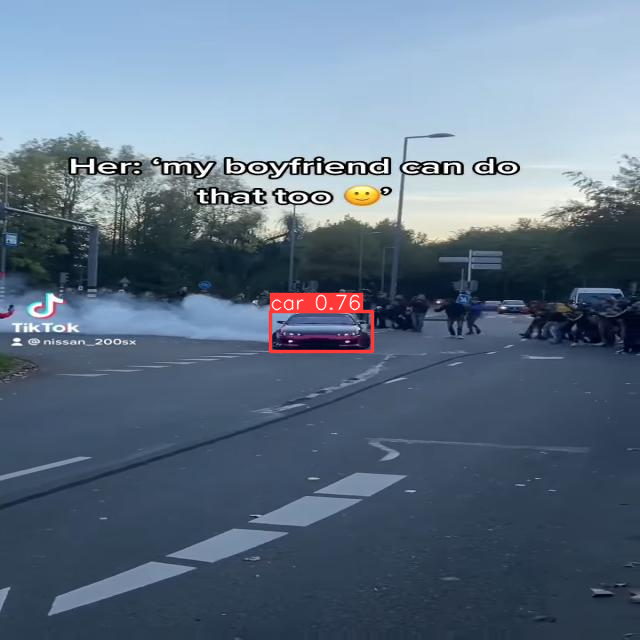

Displaying results for YOLOv8s Fine:


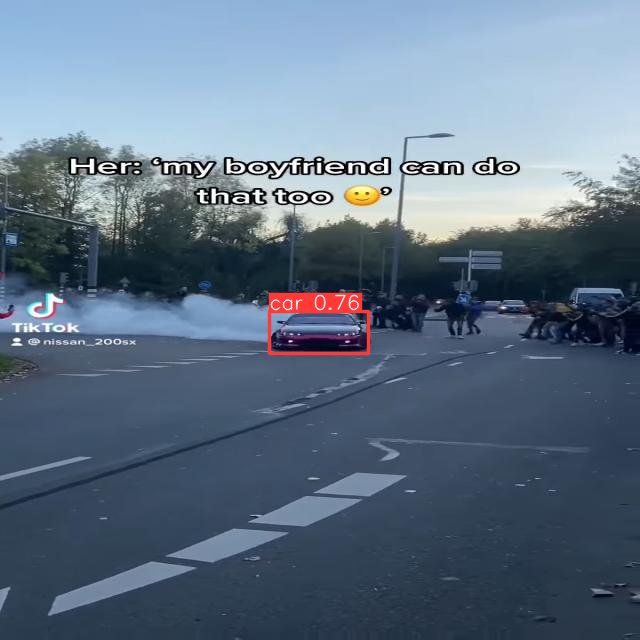

Displaying results for Custom:


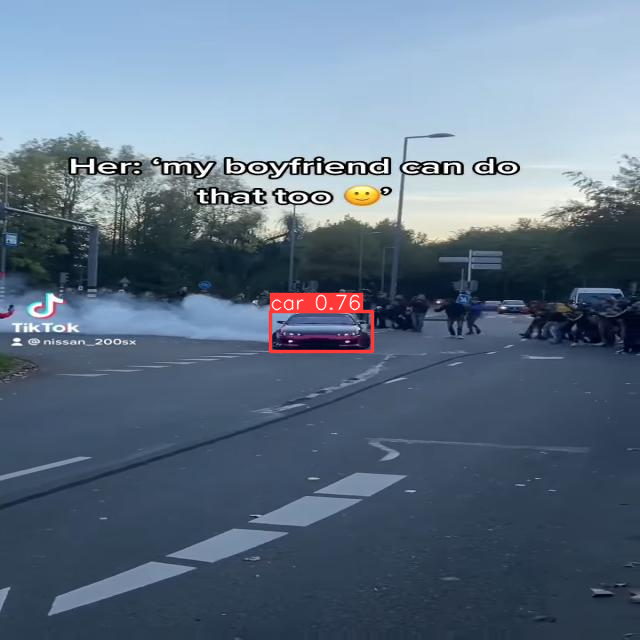

Displaying results for Custom Fine:


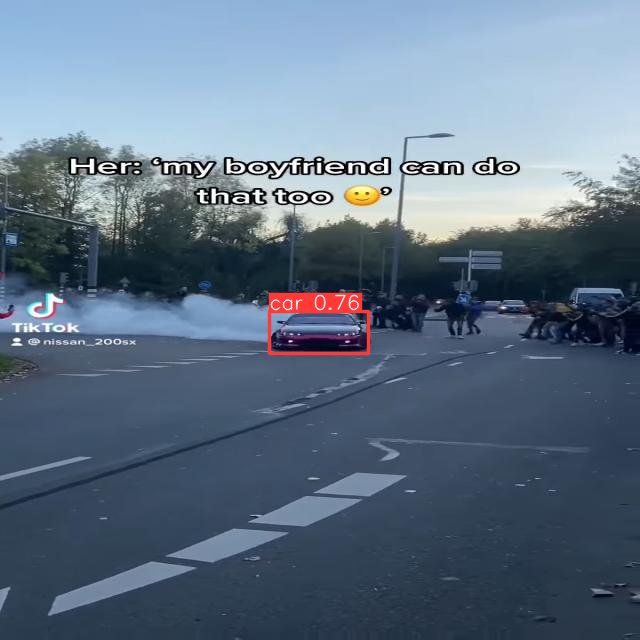

In [55]:
# Select one image to visualize across models
image_index = 0  # Assuming you want to visualize the first image's results

for model_name, results in models_results.items():
    print(f"Displaying results for {model_name}:")
    # Use the plot method on the selected image's results
    image_with_predictions = results[image_index].plot()  # This returns an annotated image
    # Convert BGR to RGB
    image_with_predictions_rgb = Image.fromarray(image_with_predictions[..., ::-1])
    # Display the image with predictions
    display(image_with_predictions_rgb)

Displaying results for YOLOv8s:


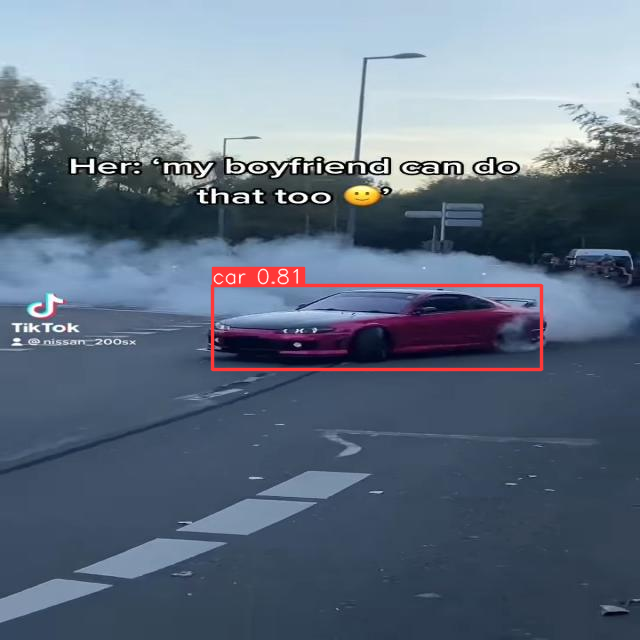

Displaying results for YOLOv8s Fine:


Displaying results for Custom:


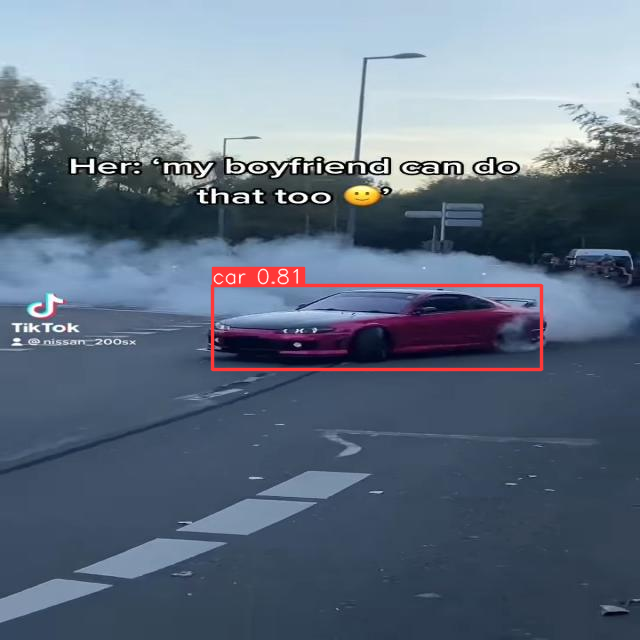

Displaying results for Custom Fine:


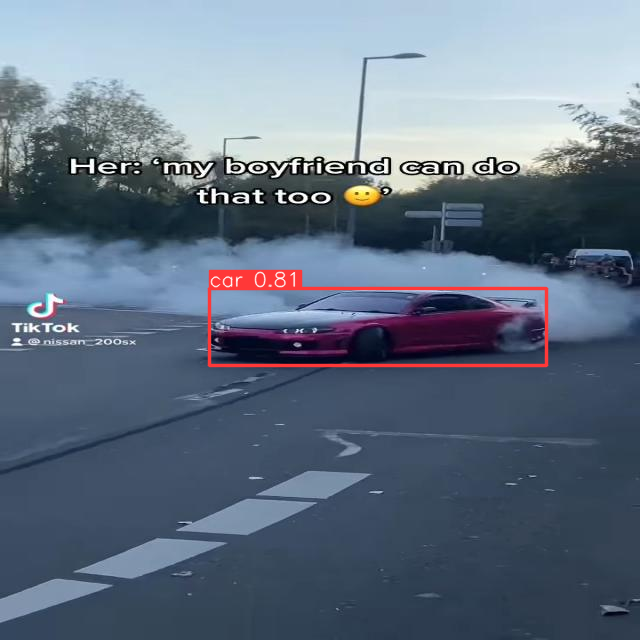

In [66]:
image_indices = range(len(next(iter(models_results.values()))))
random_image_index = random.choice(list(image_indices))

for model_name, results in models_results.items():
    print(f"Displaying results for {model_name}:")
    # Use the plot method on the randomly selected image's results
    image_with_predictions = results[random_image_index].plot()  # This returns an annotated image
    # Convert BGR to RGB
    image_with_predictions_rgb = Image.fromarray(image_with_predictions[..., ::-1])
    # Display the image with predictions
    display(image_with_predictions_rgb)

In [67]:
# Generate predictions for each model using the new dataset
results_custom_fine_test2 = model_custom_fine.predict("C:/Users/shane/Car_Detection/Car-detection-1/test/test_images2")
results_yolov8s_test2 = model_yolov8s.predict("C:/Users/shane/Car_Detection/Car-detection-1/test/test_images2")
results_yolov8s_fine_test2 = model_yolov8s_fine.predict("C:/Users/shane/Car_Detection/Car-detection-1/test/test_images2")
results_custom_test2 = model_custom.predict("C:/Users/shane/Car_Detection/Car-detection-1/test/test_images2")

# Prepare to display predictions in the same manner as before
models_results_test2 = {
    "YOLOv8s (Test2)": results_yolov8s_test2,
    "YOLOv8s Fine (Test2)": results_yolov8s_fine_test2,
    "Custom (Test2)": results_custom_test2,
    "Custom Fine (Test2)": results_custom_fine_test2,
}


image 1/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_25100.jpg: 384x640 (no detections), 201.6ms
image 2/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_25120.jpg: 384x640 (no detections), 204.5ms
image 3/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_25140.jpg: 384x640 (no detections), 191.0ms
image 4/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_25160.jpg: 384x640 (no detections), 220.8ms
image 5/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_25180.jpg: 384x640 (no detections), 263.0ms
image 6/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_25200.jpg: 384x640 (no detections), 226.6ms
image 7/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_25220.jpg: 384x640 (no detections), 208.3ms
image 8/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_25240.jpg: 384x640 (no detections), 215.0ms

image 69/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_27940.jpg: 384x640 1 car, 247.7ms
image 70/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_27960.jpg: 384x640 (no detections), 239.0ms
image 71/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_27980.jpg: 384x640 (no detections), 363.8ms
image 72/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_28000.jpg: 384x640 (no detections), 205.4ms
image 73/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_28020.jpg: 384x640 (no detections), 202.6ms
image 74/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_28040.jpg: 384x640 (no detections), 361.9ms
image 75/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_28060.jpg: 384x640 (no detections), 201.6ms
image 76/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_28080.jpg: 384x640 (no detections), 195.8ms
im

image 136/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_30700.jpg: 384x640 (no detections), 189.1ms
image 137/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_30720.jpg: 384x640 (no detections), 179.5ms
image 138/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_30740.jpg: 384x640 1 car, 182.4ms
image 139/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_30760.jpg: 384x640 2 cars, 175.7ms
image 140/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_30820.jpg: 384x640 1 car, 191.0ms
image 141/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_30840.jpg: 384x640 1 car, 196.8ms
image 142/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_30860.jpg: 384x640 1 car, 186.2ms
image 143/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_30920.jpg: 384x640 1 car, 178.6ms
image 144/175 C:\Users\shane\Car_Detection\

image 28/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_26860.jpg: 384x640 1 car, 322.6ms
image 29/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_26880.jpg: 384x640 1 car, 264.0ms
image 30/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_26900.jpg: 384x640 2 cars, 214.1ms
image 31/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_26920.jpg: 384x640 2 cars, 199.7ms
image 32/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_26940.jpg: 384x640 2 cars, 281.3ms
image 33/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_26960.jpg: 384x640 1 car, 224.6ms
image 34/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_26980.jpg: 384x640 (no detections), 200.6ms
image 35/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_27240.jpg: 384x640 1 car, 197.8ms
image 36/175 C:\Users\shane\Car_Detection\Car-detection-1\t

image 95/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_28660.jpg: 384x640 (no detections), 411.8ms
image 96/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_28680.jpg: 384x640 (no detections), 312.0ms
image 97/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_28700.jpg: 384x640 (no detections), 196.8ms
image 98/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_29000.jpg: 384x640 2 cars, 270.7ms
image 99/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_29020.jpg: 384x640 1 car, 248.6ms
image 100/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_29040.jpg: 384x640 1 car, 223.7ms
image 101/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_29060.jpg: 384x640 (no detections), 194.9ms
image 102/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_29080.jpg: 384x640 (no detections), 210.2ms
image 103/175 C:\U

image 162/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_31480.jpg: 384x640 (no detections), 215.0ms
image 163/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_31500.jpg: 384x640 (no detections), 209.3ms
image 164/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_31520.jpg: 384x640 (no detections), 229.4ms
image 165/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_31560.jpg: 384x640 1 car, 228.5ms
image 166/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_31600.jpg: 384x640 2 cars, 264.0ms
image 167/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_31620.jpg: 384x640 1 car, 290.9ms
image 168/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_31640.jpg: 384x640 (no detections), 257.3ms
image 169/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_31660.jpg: 384x640 (no detections), 217.9ms
image 170/175

image 54/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_27640.jpg: 384x640 1 car, 202.6ms
image 55/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_27660.jpg: 384x640 (no detections), 202.6ms
image 56/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_27680.jpg: 384x640 (no detections), 193.9ms
image 57/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_27700.jpg: 384x640 (no detections), 186.2ms
image 58/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_27720.jpg: 384x640 (no detections), 200.6ms
image 59/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_27740.jpg: 384x640 (no detections), 187.2ms
image 60/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_27760.jpg: 384x640 (no detections), 179.5ms
image 61/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_27780.jpg: 384x640 (no detections), 208.3ms
im

image 121/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_29840.jpg: 384x640 1 car, 178.6ms
image 122/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_29860.jpg: 384x640 (no detections), 182.4ms
image 123/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_29880.jpg: 384x640 (no detections), 182.4ms
image 124/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_29900.jpg: 384x640 (no detections), 202.6ms
image 125/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_29980.jpg: 384x640 (no detections), 187.2ms
image 126/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_30000.jpg: 384x640 (no detections), 175.7ms
image 127/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_30020.jpg: 384x640 (no detections), 189.1ms
image 128/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_30040.jpg: 384x640 (no detections), 18

image 12/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_26420.jpg: 384x640 (no detections), 175.7ms
image 13/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_26560.jpg: 384x640 1 car, 190.1ms
image 14/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_26580.jpg: 384x640 1 car, 204.5ms
image 15/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_26600.jpg: 384x640 (no detections), 189.1ms
image 16/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_26620.jpg: 384x640 1 car, 193.0ms
image 17/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_26640.jpg: 384x640 2 cars, 181.4ms
image 18/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_26660.jpg: 384x640 1 car, 188.2ms
image 19/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_26680.jpg: 384x640 1 car, 190.1ms
image 20/175 C:\Users\shane\Car_Detection\Car-detec

image 80/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_28340.jpg: 384x640 (no detections), 199.7ms
image 81/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_28360.jpg: 384x640 (no detections), 190.1ms
image 82/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_28380.jpg: 384x640 (no detections), 178.6ms
image 83/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_28420.jpg: 384x640 1 car, 175.7ms
image 84/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_28440.jpg: 384x640 1 car, 189.1ms
image 85/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_28460.jpg: 384x640 (no detections), 204.5ms
image 86/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_28480.jpg: 384x640 (no detections), 180.5ms
image 87/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_28500.jpg: 384x640 (no detections), 179.5ms
image 88/175

image 147/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_31060.jpg: 384x640 1 car, 190.1ms
image 148/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_31080.jpg: 384x640 2 cars, 186.2ms
image 149/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_31100.jpg: 384x640 1 car, 182.4ms
image 150/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_31120.jpg: 384x640 2 cars, 183.4ms
image 151/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_31140.jpg: 384x640 1 car, 214.1ms
image 152/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_31160.jpg: 384x640 1 car, 206.4ms
image 153/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_31180.jpg: 384x640 (no detections), 194.9ms
image 154/175 C:\Users\shane\Car_Detection\Car-detection-1\test\test_images2\vid_5_31200.jpg: 384x640 (no detections), 176.6ms
image 155/175 C:\Users\shane\Car_Detection

Displaying results for YOLOv8s (Test2):


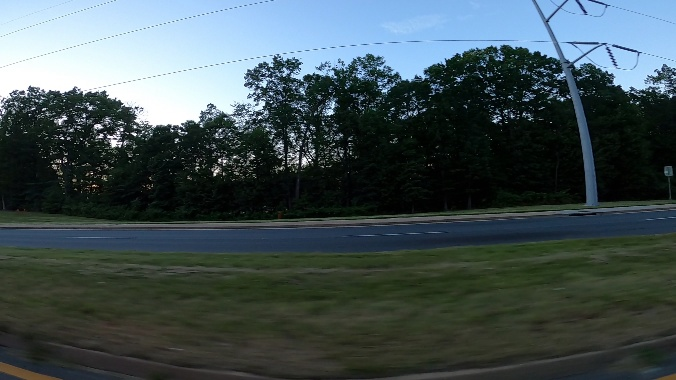

Displaying results for YOLOv8s Fine (Test2):


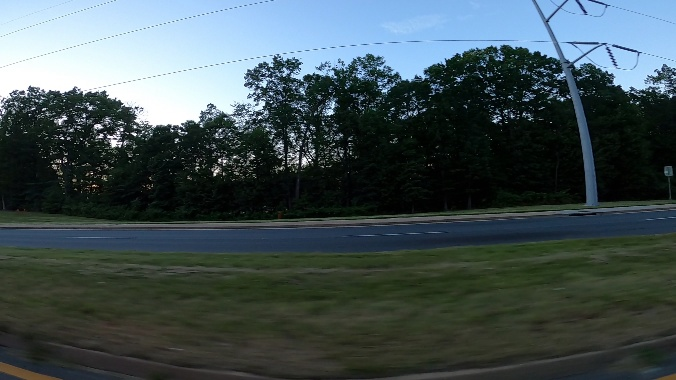

Displaying results for Custom (Test2):


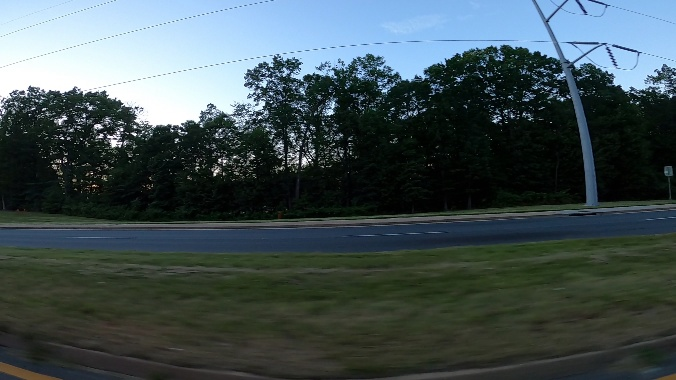

Displaying results for Custom Fine (Test2):


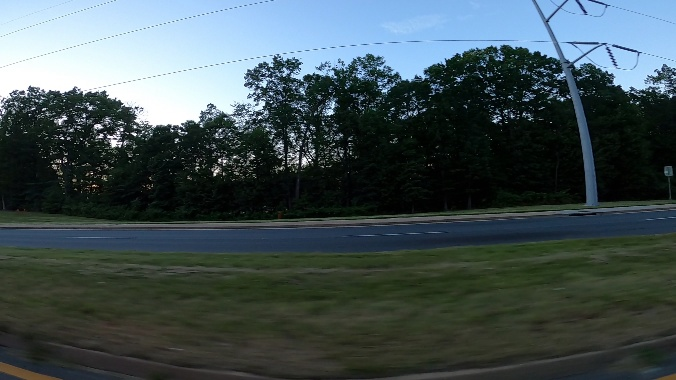

In [68]:
# Select one image to visualize across models
image_index_test2 = 0  # Assuming you want to visualize the first image's results

for model_name, results in models_results_test2.items():
    print(f"Displaying results for {model_name}:")
    # Use the plot method on the selected image's results
    image_with_predictions = results[image_index_test2].plot()  # This returns an annotated image
    # Convert BGR to RGB
    image_with_predictions_rgb = Image.fromarray(image_with_predictions[..., ::-1])
    # Display the image with predictions
    display(image_with_predictions_rgb)

Displaying results for YOLOv8s (Test2):


Displaying results for YOLOv8s Fine (Test2):


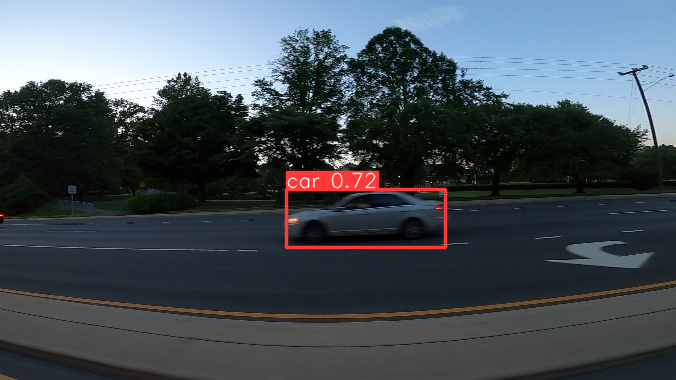

Displaying results for Custom (Test2):


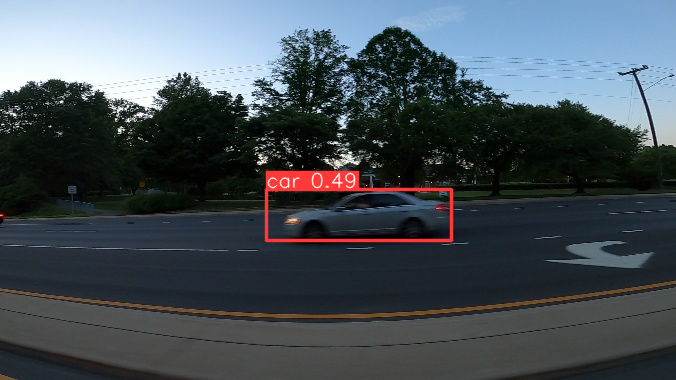

Displaying results for Custom Fine (Test2):


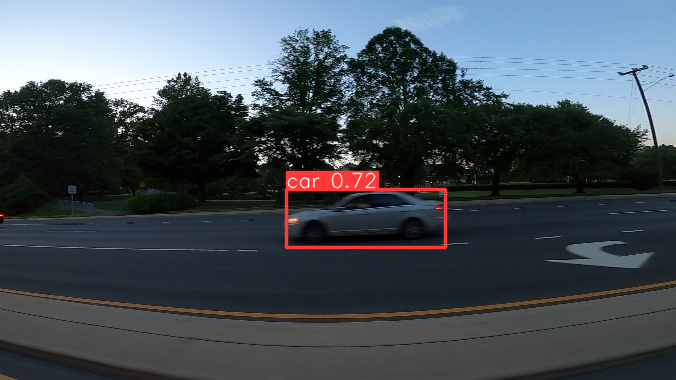

In [69]:
image_indices_test2 = range(len(models_results_test2[next(iter(models_results_test2))]))
random_image_index_test2 = random.choice(list(image_indices_test2))

for model_name, results in models_results_test2.items():
    print(f"Displaying results for {model_name}:")
    # Use the plot method on the randomly selected image's results
    image_with_predictions = results[random_image_index_test2].plot()  # This returns an annotated image
    # Convert BGR to RGB
    image_with_predictions_rgb = Image.fromarray(image_with_predictions[..., ::-1])
    # Display the image with predictions
    display(image_with_predictions_rgb)